<a href="https://colab.research.google.com/github/setyo-dwi-pratama/webscraping-python/blob/main/Web_Scraping_BeautifulSoup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping BeautifulSoup**

**Web Scraping** merupakan cara untuk mengambil data dari sebuah halaman web

Sebelum melakukan web scraping, dibutuhkan **pemahaman bahasa HTML**. Ini dikarenakan sebuah website membutuhkan HTML sebagai bahasa markup-nya

## **3 Elemen Website**

1. **HTML** adalah komponen utama dalam membangun web dan dibagun dari tag-tag untuk menyusun heading, paragraf, table dan sebagainya.

2. **CSS** adalah bahasa untuk membuat web terlihat lebih indah seperti warna, ukuran, posisi dan sebagainya.

3. **Javascript** adalah bahasa digunakan untuk melengkapi web agar terlihat lebih interaktif

## **Web Scraping** 

Halaman Website : http://quotes.toscrape.com

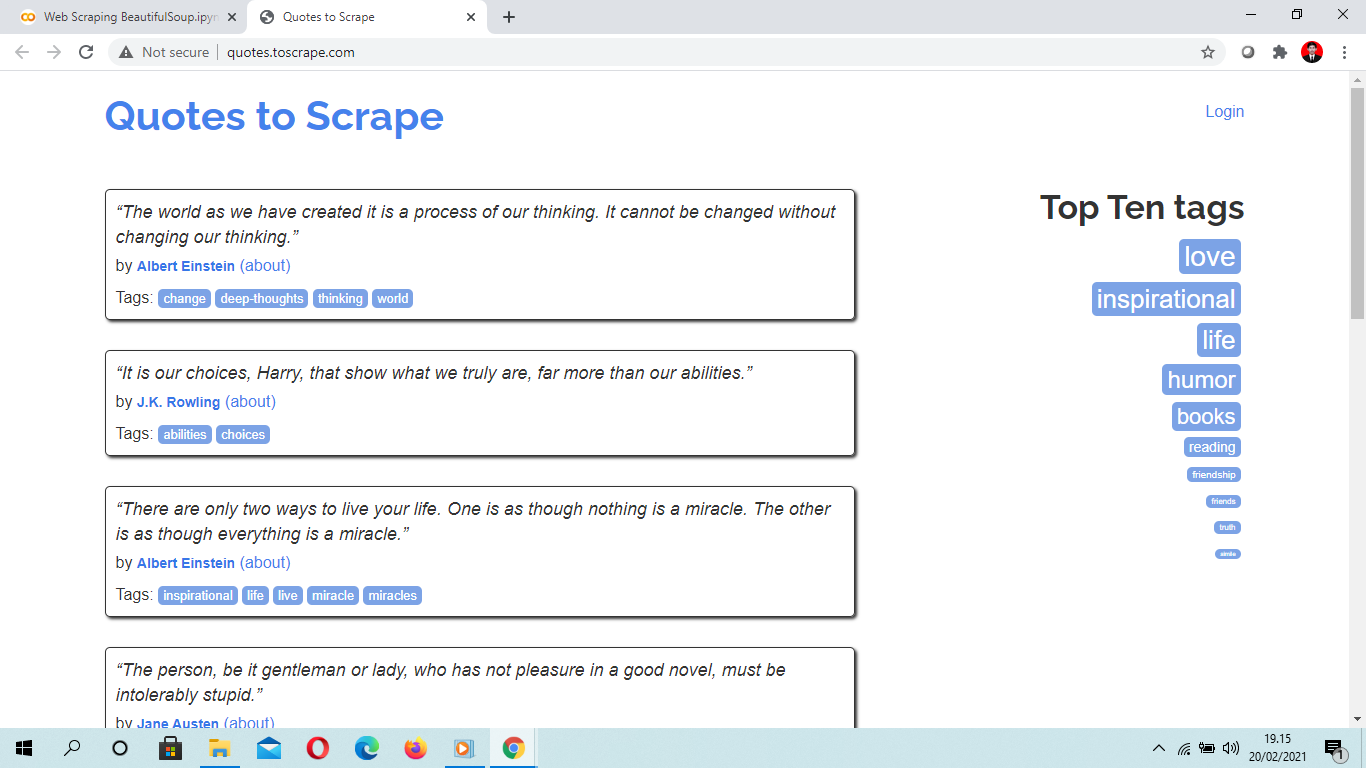

Di halaman http://quotes.toscrape.com terdapat 2 section yaitu **bagian kiri** yang terdiri dari **title, quotes, author dan tags -nya**

Sedangkan di **bagian kanan** terdiri dari **tags yang paling populer**

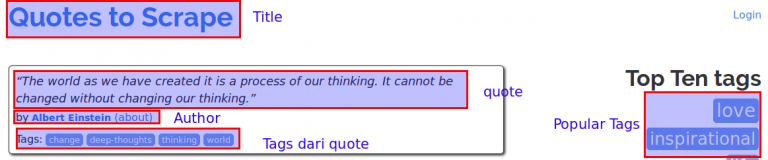

Website http://quotes.toscrape.com terdiri dari **3 komponen yaitu HTML, CSS dan Javascript**

## **Inspect Element Website**

Untuk mengetahui kode dari website http://quotes.toscrape.com kita bisa lakukan dengan teknik **inspect element** melalui browser

Caranya **klik kanan** di halaman website yang ingin diinspect kemudian **pilih Inspect Element** dan akan muncul halaman kode HTML dari halaman website tersebut.

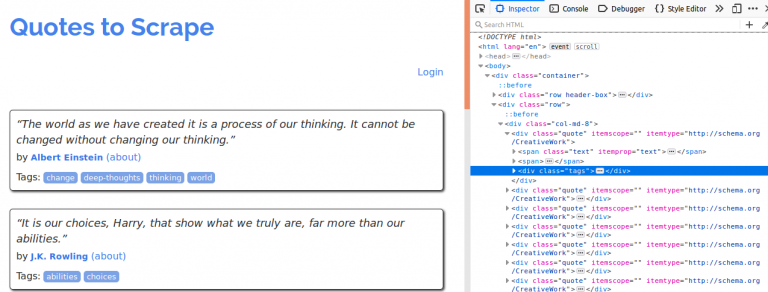

Kita juga bisa melakukan highlight terhadap komponen website tertentu dan melihat kode spesifiknya dengan menggunakan tombol panah di pojok halaman inspector dan pilih halaman website yang ingin dilihat kodenya

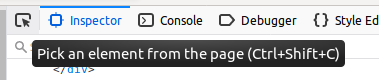

Misal ingin melihat kode HTML dari halaman quote paling atas

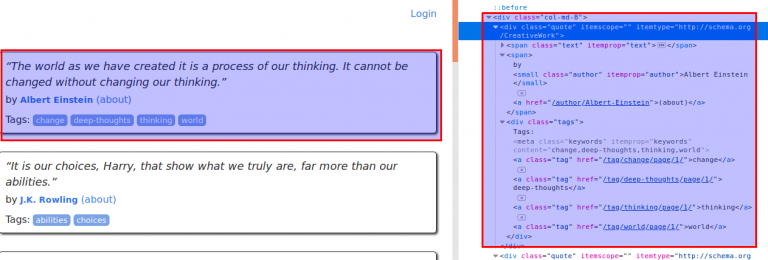

Selanjutnya kita lihat lebih kode HTML lebih detail dari quote pertama

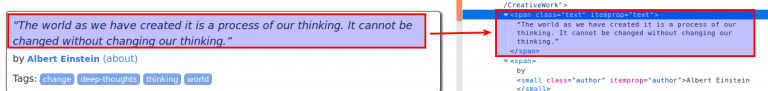

**Quote pertama dari Albert Einstein** dengan quote “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.” 

diapit oleh **tag <span>** dengan **class atribut “text“**

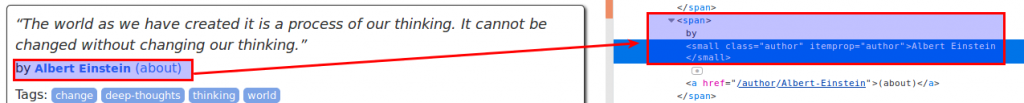

**Element author** (Albert Einstein) 

diapit oleh **tag <span>** dan **<small> dengan class author**

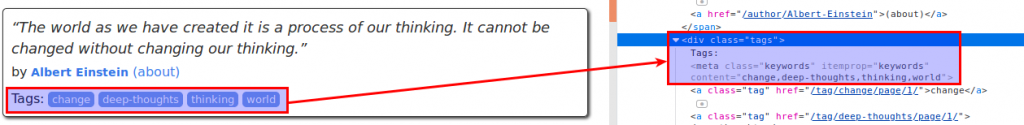

Sedangkan **tags quote** 

diapit oleh tag (div) dengan class tags yang didalamnya menggunakan tag <meta> dengan class keywords

## **BeautifulSoup**
BeautifulSoup merupakan library python digunakan untuk melakukan web scraping dalam package bs4.

In [57]:
from bs4 import BeautifulSoup
from requests import get
import pandas as pd
url = 'http://quotes.toscrape.com/'
respone = get(url)

In [4]:
html_soup = BeautifulSoup(respone.text, 'html.parser')

In [8]:
html_soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Quotes to Scrape</title>
<link href="/static/bootstrap.min.css" rel="stylesheet"/>
<link href="/static/main.css" rel="stylesheet"/>
</head>
<body>
<div class="container">
<div class="row header-box">
<div class="col-md-8">
<h1>
<a href="/" style="text-decoration: none">Quotes to Scrape</a>
</h1>
</div>
<div class="col-md-4">
<p>
<a href="/login">Login</a>
</p>
</div>
</div>
<div class="row">
<div class="col-md-8">
<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="

## **Fungsi find()**

Untuk mengambil potongan kode HTML atau konten dari HTML gunakan fungsi find()

**Fungsi find()** akan mengambil data berdasarkan tag HTML. Jika terdapat tag HTML yang sama lebih dari satu maka yang diambil adalah **tag yang paling atas di halaman HTML**

In [11]:
judul = html_soup.find('p')
judul

<p>
<a href="/login">Login</a>
</p>

Jika ingin mengambil nilai dari **tag (p)** dengan nama class tertentu maka tambahkan **parameter class** di dalam fungi **find()**

Misal kita tambahkan parameter **class_ judul dan paragraf** untuk mengambil nilai dari **tag (p)** dengan kedua class tersebut

In [28]:
paragraf = html_soup.find('span', class_='text').text
print(paragraf)

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”


## **Fungsi find_all()**

Fungsi find() hanya dapat mengekstrak satu ouput sedangkan biasanya banyak tag HTML yang sama yang ingin diambil semuanya.

Untuk mengambil konten HTML dengan tag yang sama gunakan fungsi find_all()

In [41]:
semua_h1 = html_soup.find_all('h1')
semua_h2 = html_soup.find_all('h2')
semua_paragaraf = html_soup.find_all('p')
semua_a = html_soup.find_all('a')

In [42]:
print(semua_h1)

[<h1>
<a href="/" style="text-decoration: none">Quotes to Scrape</a>
</h1>]


In [43]:
print(semua_h2)

[<h2>Top Ten tags</h2>]


In [44]:
print(semua_a)

[<a href="/" style="text-decoration: none">Quotes to Scrape</a>, <a href="/login">Login</a>, <a href="/author/Albert-Einstein">(about)</a>, <a class="tag" href="/tag/change/page/1/">change</a>, <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>, <a class="tag" href="/tag/thinking/page/1/">thinking</a>, <a class="tag" href="/tag/world/page/1/">world</a>, <a href="/author/J-K-Rowling">(about)</a>, <a class="tag" href="/tag/abilities/page/1/">abilities</a>, <a class="tag" href="/tag/choices/page/1/">choices</a>, <a href="/author/Albert-Einstein">(about)</a>, <a class="tag" href="/tag/inspirational/page/1/">inspirational</a>, <a class="tag" href="/tag/life/page/1/">life</a>, <a class="tag" href="/tag/live/page/1/">live</a>, <a class="tag" href="/tag/miracle/page/1/">miracle</a>, <a class="tag" href="/tag/miracles/page/1/">miracles</a>, <a href="/author/Jane-Austen">(about)</a>, <a class="tag" href="/tag/aliteracy/page/1/">aliteracy</a>, <a class="tag" href="/tag/books/page/

In [45]:
print(semua_paragaraf)

[<p>
<a href="/login">Login</a>
</p>, <p class="text-muted">
                Quotes by: <a href="https://www.goodreads.com/quotes">GoodReads.com</a>
</p>, <p class="copyright">
                Made with <span class="sh-red">❤</span> by <a href="https://scrapinghub.com">Scrapinghub</a>
</p>]


Biasanya **fungsi find_all()** digunakan **untuk mengambil data yang berbentuk table atau list**

## **Ekstrak Halaman dengan BeautifulSoup**

Dengan menggunakan library BeautifulSoup untuk mengambil element HTML yang ingin disimpan seperti konten **quote, author, tag** dengan menggunakan **class attribut** di kode HTML.

Setelah mengetahui class attribut gunakan fungsi find() atau find_all() untuk mengekstrak konten dari halaman website

BeautifulSoup memanfaatkan **atribut class / id** untuk mengambil data dari halaman web.

### **Quotes**

Inspect quote pertama dari Albert Einstein dan dapatkan nama class yang digunakan

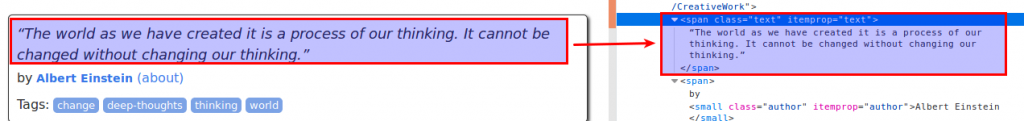

Tag yang digunakan adalah **span** dengan nama classs **text**



In [46]:
quote = html_soup.find('span', class_='text')
quote

<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>

Jika hanya ingin **mengambil quote saja** tanpa tag HTML tambahkan properti **text** di akhir fungsi find() seperti ini

In [47]:
quote = html_soup.find('span', class_='text').text
quote

'“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”'

### **Author**
Tag yang digunakan untuk Author adalah (small) dengan **nama class author**

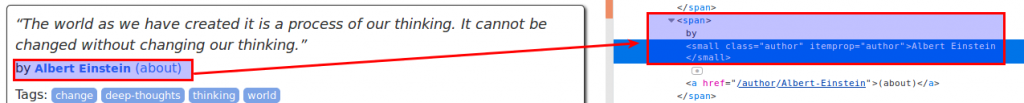

In [53]:
# Dengan Fungsi find()
author = html_soup.find('small', class_='author')
author

<small class="author" itemprop="author">Albert Einstein</small>

In [54]:
author = html_soup.find('small', class_='author').text
author

'Albert Einstein'

In [60]:
# Dengan Fungsi find_all()
author = html_soup.find_all('small', class_='author')
author

[<small class="author" itemprop="author">Albert Einstein</small>,
 <small class="author" itemprop="author">J.K. Rowling</small>,
 <small class="author" itemprop="author">Albert Einstein</small>,
 <small class="author" itemprop="author">Jane Austen</small>,
 <small class="author" itemprop="author">Marilyn Monroe</small>,
 <small class="author" itemprop="author">Albert Einstein</small>,
 <small class="author" itemprop="author">André Gide</small>,
 <small class="author" itemprop="author">Thomas A. Edison</small>,
 <small class="author" itemprop="author">Eleanor Roosevelt</small>,
 <small class="author" itemprop="author">Steve Martin</small>]

### **Tags**
Dan terakhir adalah tags dari quote

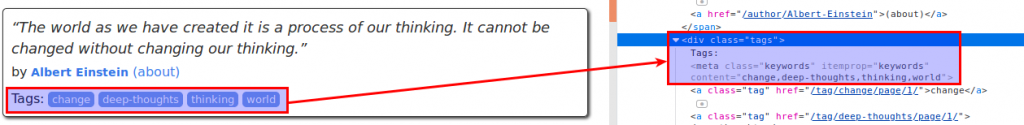

Untuk element tags agak sedikit lebih rumit karena setiap tags diapit oleh (a) yang berada di dalam (div) sehingga tags harus disimpan ke dalam List

Dibutuhkan fungsi find() untuk mengambil konten (div) dan fungsi find_all() untuk mengambil isi dari (a)

Tambahkan kode berikut untuk mengambil text dari tags yang disimpan ke dalam List

In [61]:
tags = [tag.text for tag in html_soup.find('div', class_='tags').find_all('a', class_='tag')]

print(tags)

['change', 'deep-thoughts', 'thinking', 'world']


## **Scrpaping Multi dari satu halaman**

Kalau kita lihat http://quotes.toscrape.com/ pada halaman pertama terdapat 20 quote. Berikut adalah contoh 3 quote-nya



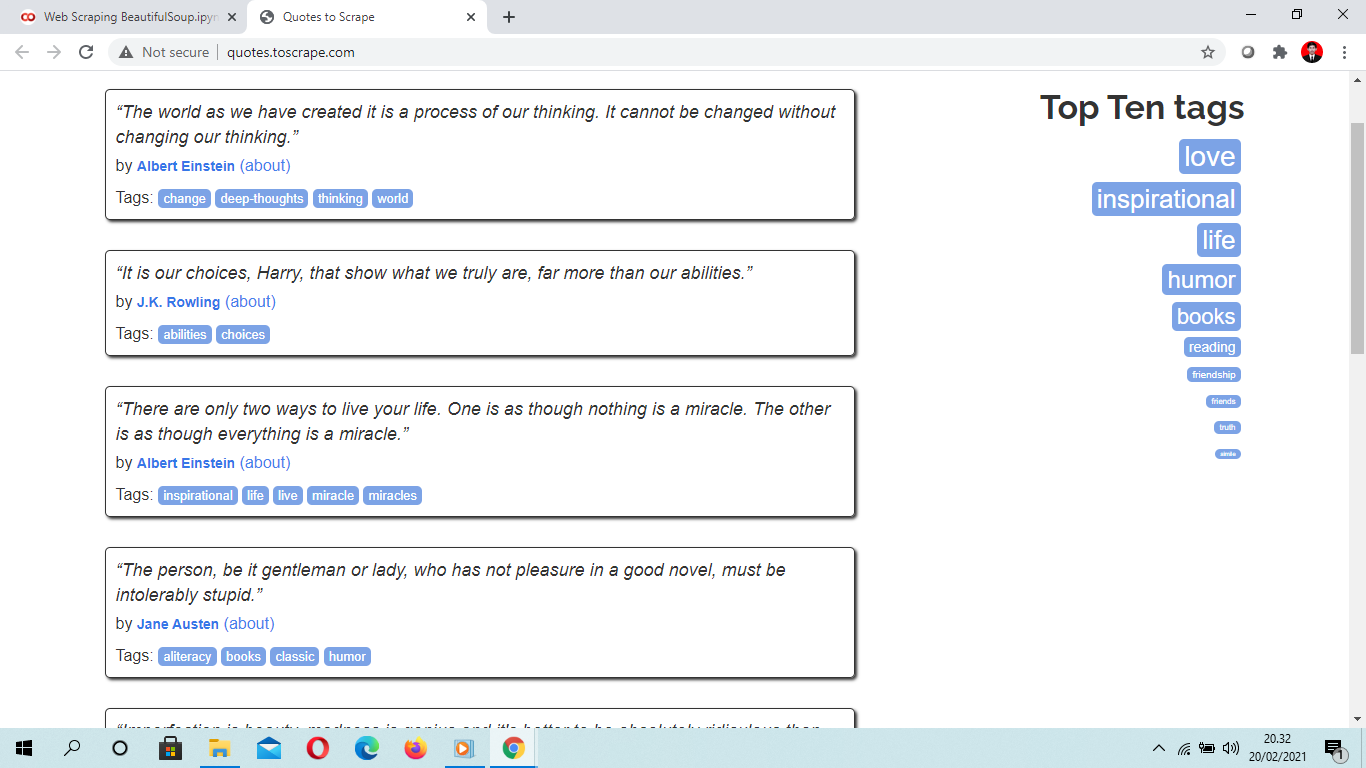

Jika dilakukan inspect element maka diketahui bahwa tag HTML yang digunakan oleh setiap quote adalah sama

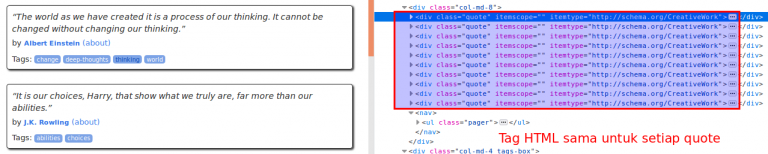

Berikut adalah outer HTML dari quote

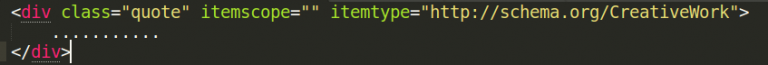

Bahwa setiap quote berada di tag (div) dengan nama class quote

Di dalam tag (div) baru terdapat tag-tag HTML lainnya untuk menyimpan konten seperti quote, author, dan tags

Berikut adalah satu contoh kode HTML dari satu qoute

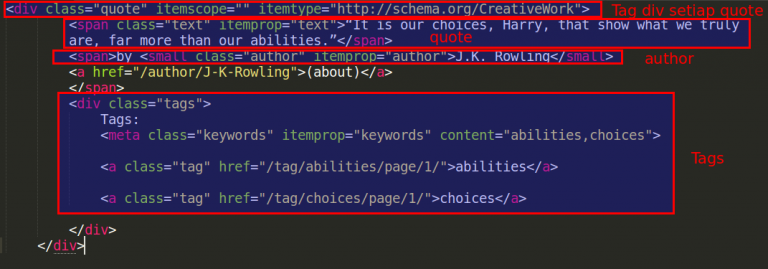

### **Scrap all quotes**

Karena setiap quote kode HTML yang digunakan sama maka gunakan fungsi find_all() untuk mengambil semua konten quote dalam satu halaman

Jika menggunakan fungsi find() hanya quote pertama yang akan diambil 

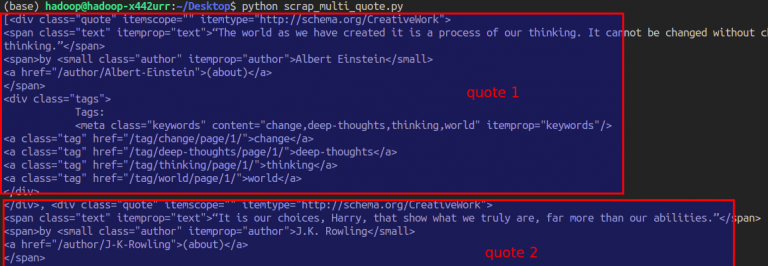

Gunakan **tag (div)** dengan **nama class quote**

In [63]:
all_quotes = html_soup.find_all('div', class_='quote')
all_quotes

[<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
 <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
 <span>by <small class="author" itemprop="author">Albert Einstein</small>
 <a href="/author/Albert-Einstein">(about)</a>
 </span>
 <div class="tags">
             Tags:
             <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
 <a class="tag" href="/tag/change/page/1/">change</a>
 <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
 <a class="tag" href="/tag/thinking/page/1/">thinking</a>
 <a class="tag" href="/tag/world/page/1/">world</a>
 </div>
 </div>,
 <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
 <span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
 <span>by <small class="author" itempr

Setelah mendapatkan konten dari setiap quote selanjutnya setiap quote akan diambil **konten text quote, author, dan tags** -nya

Untuk memudahkan mengambil konten setiap quote **gunakan perulangan**.

In [67]:
for i in all_quotes:
  quote = i.find('span', class_='text').text
  author = i.find('small', class_='author').text
  tags = [tag.text for tag in i.find('div', class_='tags').find_all('a', class_='tag')]
  
  print(quote)
  print(author)
  print(tags)

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Albert Einstein
['change', 'deep-thoughts', 'thinking', 'world']
“It is our choices, Harry, that show what we truly are, far more than our abilities.”
J.K. Rowling
['abilities', 'choices']
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Albert Einstein
['inspirational', 'life', 'live', 'miracle', 'miracles']
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Jane Austen
['aliteracy', 'books', 'classic', 'humor']
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Marilyn Monroe
['be-yourself', 'inspirational']
“Try not to become a man of success. Rather become a man of value.”
Albert Einstein
['adulthood', 'success', 'value']
“It is better to be hated for what you are than to b

## **Scraping Untuk banyak Halaman/Next Page**

Kalau kita lihat di halaman http://quotes.toscrape.com/ di bagian bawah terdapat tombol Next untuk melanjutkan ke halaman quote selanjutnya

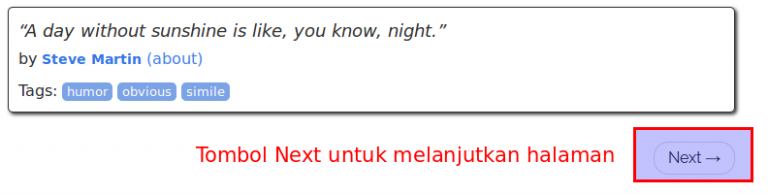

Jika kita tekan tombol Next maka akan masuk pada halaman ke-2. (Liat URL di browser)

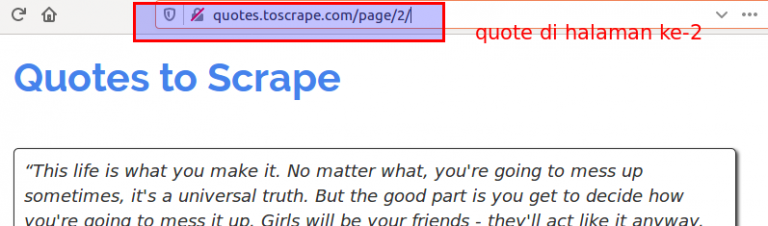

Jika di tekan Next lagi akan berlanjut ke halaman ke-3 dan seterusnya

### **Scrap All Pages**
Kita akan melakukan web scraping untuk mengambil quote di semua halaman

Kalau kita klik tombol Next secara terus menerus kita akan tahu bahwa website http://quotes.toscrape.com/ terdiri dari 10 halaman

Kita akan gunakan iterasi sebanyak 10 kali untuk mengambil seluruh halaman

Pertama kita buat format URL yang akan di-scraping untuk membentuk URL seperti ini

    http://quotes.toscrape.com/page/2/
    http://quotes.toscrape.com/page/3/
    http://quotes.toscrape.com/page/4/
    ......
    http://quotes.toscrape.com/page/10/

In [68]:
# menggunakan perulangan 
for page in range(2,11):
  url = "http://quotes.toscrape.com/page/"+str(page)
  print(url)

http://quotes.toscrape.com/page/2
http://quotes.toscrape.com/page/3
http://quotes.toscrape.com/page/4
http://quotes.toscrape.com/page/5
http://quotes.toscrape.com/page/6
http://quotes.toscrape.com/page/7
http://quotes.toscrape.com/page/8
http://quotes.toscrape.com/page/9
http://quotes.toscrape.com/page/10


URL di setiap iterasi akan berubah-ubah sehingga library BeautifulSoup akan mengekstrak data yang berbeda untuk setiap iterasinya / halaman webiste.

Di dalam setiap iterasi halaman akan ambil setiap quotes (quote,author,tags )

In [69]:
quotes = html_soup.find_all('div', class_='quote')
    
for i in quotes:
    quote = i.find('span', class_='text').text
    author = i.find('small', class_='author').text
    tags = [tag.text for tag in i.find('div', class_='tags').find_all('a', class_='tag')]

    print(quote)
    print(author)
    print(tags)

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Albert Einstein
['change', 'deep-thoughts', 'thinking', 'world']
“It is our choices, Harry, that show what we truly are, far more than our abilities.”
J.K. Rowling
['abilities', 'choices']
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Albert Einstein
['inspirational', 'life', 'live', 'miracle', 'miracles']
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Jane Austen
['aliteracy', 'books', 'classic', 'humor']
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Marilyn Monroe
['be-yourself', 'inspirational']
“Try not to become a man of success. Rather become a man of value.”
Albert Einstein
['adulthood', 'success', 'value']
“It is better to be hated for what you are than to b

Karena URL untuk halaman ke-1 dengan halaman lainnya tidak sama cara paling mudah adalah melakukan percabangan URL

Jika di halaman ke-1 maka URL awal yaitu http://quotes.toscrape.com

Jika selain halaman ke-1 makan URL adalah http://quotes.toscrape.com/page/X

In [70]:
if page == 1:
  url = "http://quotes.toscrape.com"
else:
  url = "http://quotes.toscrape.com/page/"+str(page)


### **Final Code untuk seluruh Halaman web**

In [71]:
from bs4 import BeautifulSoup
import requests


# quotes di halaman 1 - 10
for page in range(1,11):
  if page == 1: 
    url = "http://quotes.toscrape.com"
  else: 
    url = "http://quotes.toscrape.com/page/"+str(page)

  page = requests.get(url)
  html_soup = BeautifulSoup(respone.text, 'html.parser')

  print(url)

  quotes = html_soup.find_all('div', class_='quote')
    
  for i in quotes:
    quote = i.find('span', class_='text').text
    author = i.find('small', class_='author').text
    tags = [tag.text for tag in i.find('div', class_='tags').find_all('a', class_='tag')]

    print(quote)
    print(author)
    print(tags)

http://quotes.toscrape.com
“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Albert Einstein
['change', 'deep-thoughts', 'thinking', 'world']
“It is our choices, Harry, that show what we truly are, far more than our abilities.”
J.K. Rowling
['abilities', 'choices']
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Albert Einstein
['inspirational', 'life', 'live', 'miracle', 'miracles']
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Jane Austen
['aliteracy', 'books', 'classic', 'humor']
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Marilyn Monroe
['be-yourself', 'inspirational']
“Try not to become a man of success. Rather become a man of value.”
Albert Einstein
['adulthood', 'success', 'value']
“It is better to be hated

## **Simpan Hasil format csv**

## **Save Hasil Scraping**

**Buat List** untuk menampung hasil scraping

In [72]:
data = []

Kemudian gunakan fungsi **append()** untuk memasukkan **quote, author dan tags** ke dalam List yang telah dibuat

In [73]:
data.append({
    'quote': quote,
    'author': author,
    'tags' : tags
})

Selanjutnya setelah iterasi selesai convert List menjadi **DataFrame** pandas dan simpan ke dalam file csv

In [78]:
df = pd.DataFrame(data)

In [79]:
df.to_csv('all_quotes.csv', index=False, encoding="utf-8")

In [82]:
hasil_csv = pd.read_csv('all_quotes.csv')

In [83]:
hasil_csv

,quote,author,tags
0,"“A day without sunshine is like, you know, nig...",Steve Martin,"['humor', 'obvious', 'simile']"


# **FINAL CODING**

In [84]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

data = []

# quotes di halaman 1 - 10
for page in range(1,11):
  if page == 1: 
    url = "http://quotes.toscrape.com"
  else: 
    url = "http://quotes.toscrape.com/page/"+str(page)

  page = requests.get(url)
  soup = BeautifulSoup(page.content, 'html.parser')


  quotes = soup.find_all('div', class_='quote')
    
  for q in quotes:
      quote = q.find('span', class_='text').text
      author = q.find('small', class_='author').text
      tags = [tag.text for tag in q.find('div', class_='tags').find_all('a', class_='tag')]

      data.append({
          'quote': quote,
          'author': author,
          'tags': tags
      })


df = pd.DataFrame(data)

df.to_csv('all_quotes.csv', index=False, encoding="utf-8")

https://ngodingdata.com/tutorial-web-scraping-dengan-beautifulsoup-di-python-part-5/